# Python Project: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [4]:
# installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn -q --user

In [6]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [9]:
# read the data
dataset = pd.read_csv("foodhub_order.csv")

In [10]:
# view the first 5 rows
dataset.head(n = 5) # shows first five rows

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### How many rows and columns are present in the data?

In [12]:
number_of_rows, number_of_columns = dataset.shape # find number of rows + columns
print ('Number of rows: ' , number_of_rows) # print
print ('Number of columns: ' , number_of_columns)

Number of rows:  1898
Number of columns:  9


#### Observations:
Based on the output, I found that the dataset contains 1,898 rows and 9 columns. This indicates that there are 1,898 records of food orders, each described by 9 different attributes. The dataset appears to have enough data points to perform meaningful analysis on customer orders and restaurant performance.

### What are the datatypes of the different columns in the dataset?

In [15]:
dataset.info() # function that gives you info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
From the output, I can see that the dataset has no missing values, as all 1,898 entries are complete across the 9 columns. The data types are a mix of integers, floats, and objects, which suggests that numerical and categorical variables are well-represented for analysis.

### Are there any missing values in the data?

In [18]:
dataset.isnull().sum() # sum of all null values in each column

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
This shows there are no null values in any of the columns in the dataset, which ensures that I can proceed with the analysis without needing to handle missing data.

### What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [21]:
# min, avg, max time for food preparation
min_prep_time = dataset['food_preparation_time'].min()
avg_prep_time = dataset['food_preparation_time'].mean()
max_prep_time = dataset['food_preparation_time'].max()

# print results
print('Mininum prep time: ' , min_prep_time)
print('Average prep time: ' , avg_prep_time)
print('Maximum prep time: ' , max_prep_time)

dataset.describe() # statistical summary of data

Mininum prep time:  20
Average prep time:  27.371970495258168
Maximum prep time:  35


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
From this output, I understnad that the food preparation time ranges from a minimum of 20 minutes to a maximum of 35 minutes, with an average preparation time of approximately 27.37 minutes. Therefore, most orders take around half an hour to prepare.

### How many orders are not rated?

In [24]:
# Write the code here
not_rated = (dataset['rating'] == 'Not given').sum() # sum of all orders not rated in data set
print('Orders not rated: ', not_rated)

Orders not rated:  736


#### Observations:
According to this, there are 736 orders that were not rated, which is a significant portion of the dataset. This suggests that many customers did not provide feedback on their orders, possibly due to forgetting, being satisfied without commenting, or experiencing issues with the rating system.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### Explore all the variables and provide observations on their distributions.

The number of all unique order IDs:  1898
The number of all unique customer IDs:  1200
The number of all unique restaurant names:  178
The number of all unique cuisine types:  14


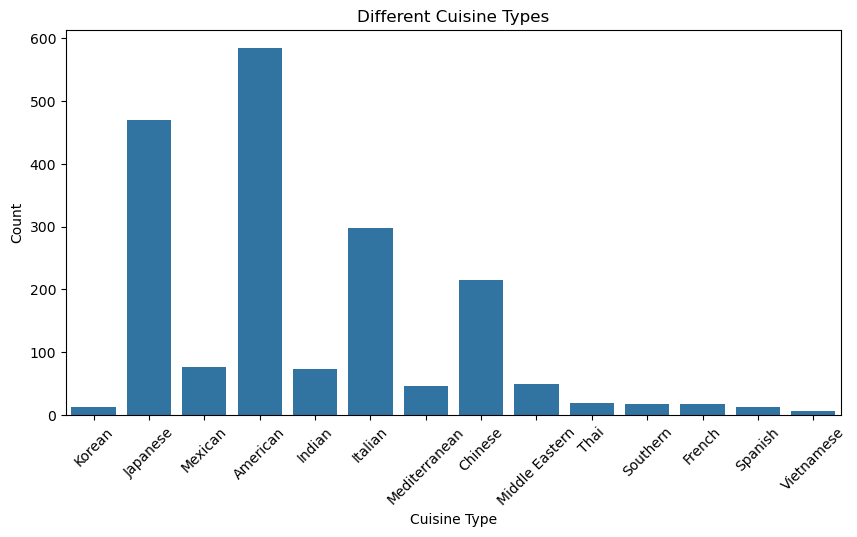

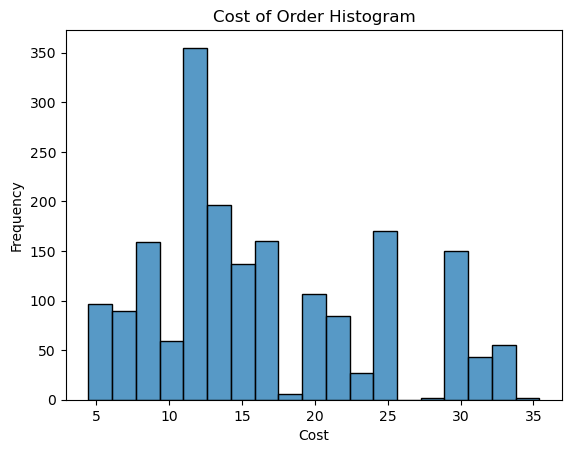

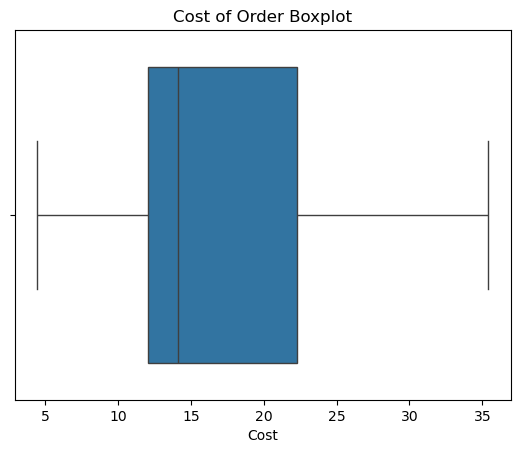

All unique days of the week in data set:  ['Weekend' 'Weekday']


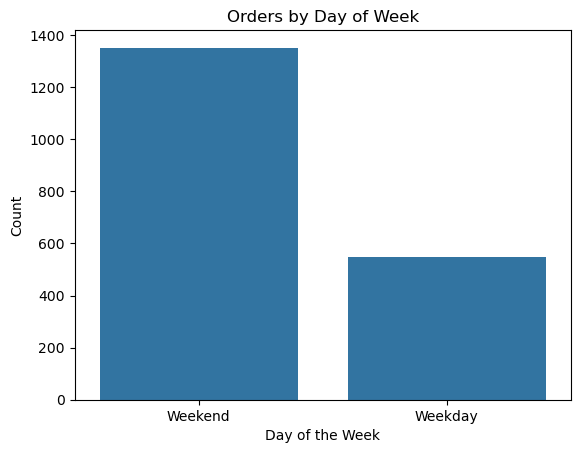

All unique ratings in data set:  ['Not given' '5' '3' '4']


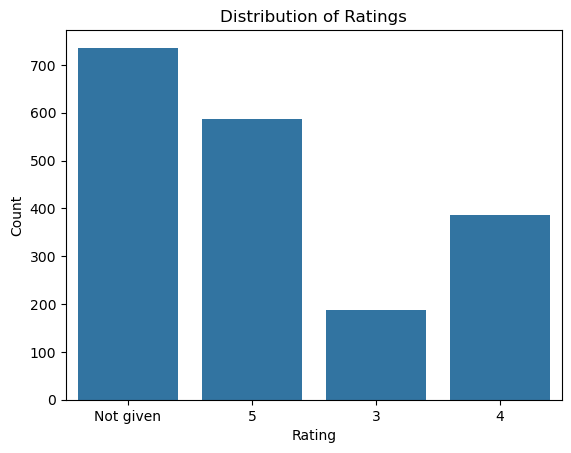

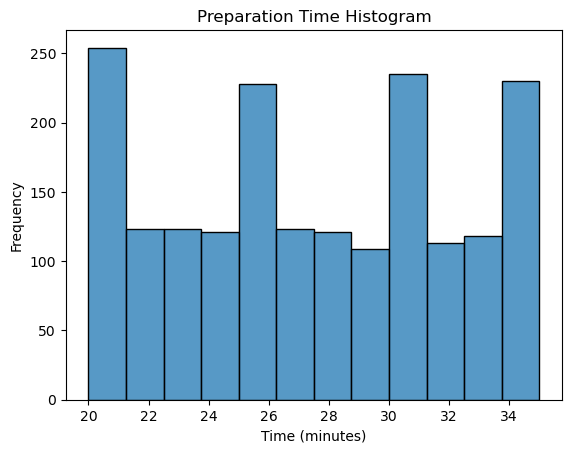

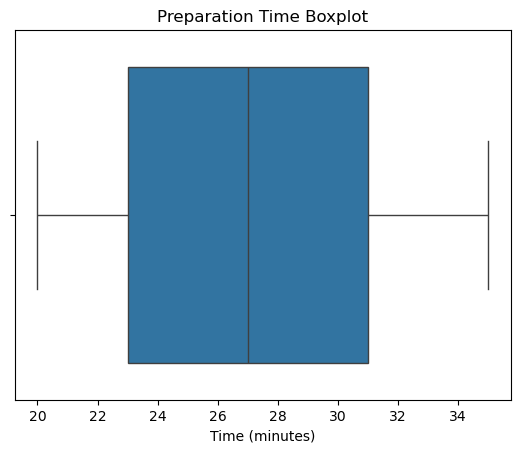

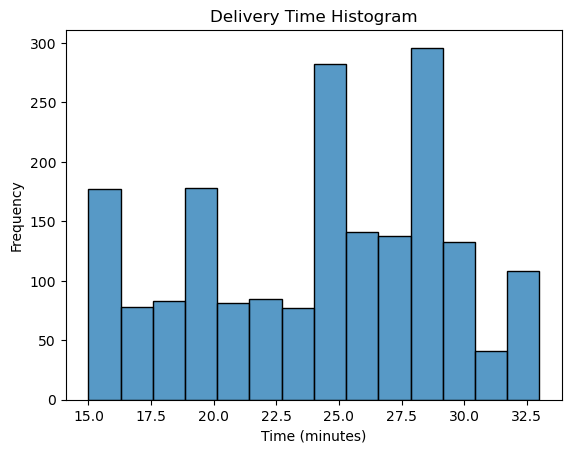

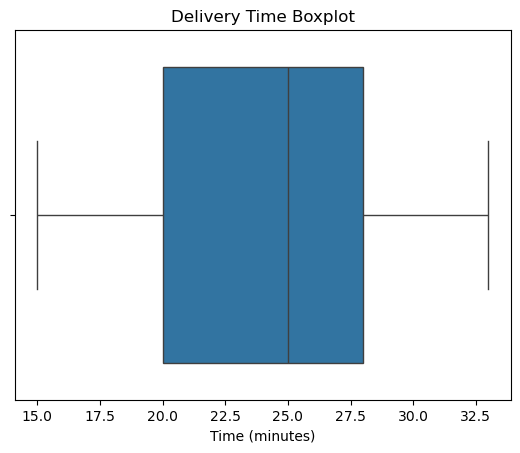

In [29]:
# exploring all variables

# order ID -----------------------------------------------------------------------------
order_id = dataset['order_id'].nunique() # number of all unique order IDs in data set
print ("The number of all unique order IDs: ", order_id)

# customer ID --------------------------------------------------------------------------
customer_id = dataset['customer_id'].nunique() # number of all unique customer IDs in data set
print ("The number of all unique customer IDs: ", customer_id)

# restaurant name ----------------------------------------------------------------------
restaurant_name = dataset['restaurant_name'].nunique() # number of all unique restaurant names in data set
print ("The number of all unique restaurant names: ", restaurant_name)

# cuisine type -------------------------------------------------------------------------
cuisine_type = dataset['cuisine_type'].nunique() # number of all unique cuisine types in data set
print ("The number of all unique cuisine types: ", cuisine_type)

plt.figure(figsize = (10, 5)) # set size so x axis labels don't interlap (better readability)
sns.countplot(data = dataset, x = 'cuisine_type') # create a countplot for cuisine types
plt.title('Different Cuisine Types') # titles/labels added for better understanding of countplot
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.xticks(rotation = 45) # added for better readability of labels
plt.show()

# cost of the order --------------------------------------------------------------------
sns.histplot(data = dataset, x = 'cost_of_the_order') # create a histogram for cost of the order
plt.title('Cost of Order Histogram') # titles/labels added for better understanding of histogram
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(data = dataset, x = 'cost_of_the_order') # create a boxplot for cost of the order
plt.title('Cost of Order Boxplot') # titles/labels added for better understanding of boxplot
plt.xlabel('Cost')
plt.show()

# day of the week ----------------------------------------------------------------------
unique_days = dataset['day_of_the_week'].unique() # all unique days in data set
print ("All unique days of the week in data set: ", unique_days)

sns.countplot(data = dataset, x = 'day_of_the_week')  # create countplot for day of the week
plt.title('Orders by Day of Week') # titles/labels added for better understanding of countplot
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

# rating -------------------------------------------------------------------------------
unique_ratings = dataset['rating'].unique() # all unique ratings in data set
print ("All unique ratings in data set: ", unique_ratings)

sns.countplot(data = dataset, x = 'rating')  # create countplot for ratings
plt.title('Distribution of Ratings') # titles/labels added for better understanding of countplot
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# food preparation time ----------------------------------------------------------------
sns.histplot(data = dataset, x = 'food_preparation_time')  # create histogram for food preparation time
plt.title('Preparation Time Histogram') # titles/labels added for better understanding of histogram
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(data = dataset, x = 'food_preparation_time')  # create boxplot for food preparation time
plt.title('Preparation Time Boxplot') # titles/labels added for better understanding of boxplot
plt.xlabel('Time (minutes)')
plt.show()

# delivery time ------------------------------------------------------------------------
sns.histplot(data = dataset, x = 'delivery_time')  # create histogram for delivery time
plt.title('Delivery Time Histogram') # titles/labels added for better understanding of histogram
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(data = dataset, x = 'delivery_time')  # create boxplot for delivery time
plt.title('Delivery Time Boxplot') # titles/labels added for better understanding of boxplot
plt.xlabel('Time (minutes)')
plt.show()

#### Observations:
Looking at the graphs, I noticed that the American and Japanese cuisines are the clear favorites, with much higher demand compared to other cuisines. Most orders cost between 10 - 25 dollars, with a lot of them clustering around 15 dollars. Most orders are placed on weekends rather than weekdays, indicating many people might order food during their free time on weekends rather than work days. For ratings, a lot of customers didn’t leave feedback, but for those who did, most gave high ratings (4 or 5), which is a good sign of satisfaction. Preparation times seem consistent across cuisines. Delivery times are slightly consistent, but a lot delivery times are clustered around 25-28 minutes, almost half an hour.

### Which are the top 5 restaurants in terms of the number of orders received?

In [31]:
top_restaurants = dataset['restaurant_name'].value_counts().head(5) # counts occurences of each name + returns top 5 names w/ highest count
print(top_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:
From this output, I can see that Shake Shack has the highest number of orders, followed by The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm. This could be due to Shake Shack's popularity and widespread recognition, possibly indicating its broad customer base and consistent demand for its offerings. The other restaurants in the top five also likely benefit from positive customer reviews, strategic locations, or unique menu offerings that attract repeat customers.

### Which is the most popular cuisine on weekends?

In [34]:
weekend_data = dataset[dataset['day_of_the_week'].isin(['Weekend'])] # filter data set for weekend data only

most_popular_cuisine = weekend_data['cuisine_type'].value_counts().idxmax() # find most popular cuisine category using weekend data
mpc_count = weekend_data['cuisine_type'].value_counts().max() # find count of most popular cuisine on weekends

# print results
print('Most popular cuisine (on weekends): ' , most_popular_cuisine)
print('How many times cuisine was bought (on weekends): ' , mpc_count)

Most popular cuisine (on weekends):  American
How many times cuisine was bought (on weekends):  415


#### Observations:
This output shows that American cuisine is the most popular choice on weekends, with 415 orders. This popularity could be due to its broad appeal and familiarity among a diverse customer base, making it a preferred option for weekend dining. 

### What percentage of the orders cost more than 20 dollars?

In [37]:
total_orders = len(dataset) # calculate total number of orders in data set
orders_above_20 = dataset[dataset['cost_of_the_order'] > 20].shape[0] # find number of orders above $20
percentage = (orders_above_20 / total_orders) * 100  # find percentage of orders above $20
percentage = round(percentage, 2) # round percentage to two decimals
print("Percentage of orders above $20: ", percentage, "%", sep = "") # print results

Percentage of orders above $20: 29.24%


#### Observations:
According to this, approximately 29.24% of orders in the dataset are above $20. This suggests that a significant portion of customers are willing to spend more on their orders, which could indicate a preference for higher-quality or larger meal options, special occasions, or delivery orders for groups. 

### What is the mean order delivery time?

In [40]:
mean_delivery_time = dataset['delivery_time'].mean() # avg delivery time
mean_delivery_time = round(percentage, 2) # round to two decimals
print('Mean delivery time: ' , mean_delivery_time, "minutes") # print result

Mean delivery time:  29.24 minutes


#### Observations:
The mean delivery time is reported as 29.24 minutes. Factors influencing this average delivery time could include restaurant proximity, traffic conditions, and operational efficiency of the delivery service used by the platform.

### The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [43]:
top_3_customers = dataset['customer_id'].value_counts().head(3) # find 3 most frequent customers
print(top_3_customers) # print customer ID and amount of orders placed

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
These 3 customers are most likely regular users of the food delivery service, indicating their satisfaction with the platform's offerings, reliability, and possible loyalty incentives like discounts or rewards. Offering them a 20% discount voucher could also potentially attract new customers through their positive experiences and recommendations.

### Multivariate Analysis

### Perform a multivariate analysis to explore relationships between the important variables in the dataset.

In [47]:
# exploring relationships between variables such as cost, cuisine type, rating, preparation time, delivery time, day of week

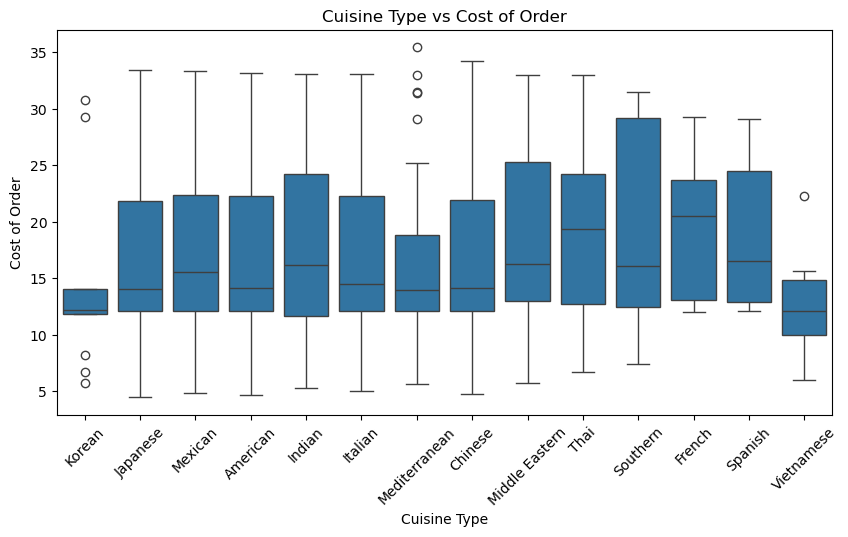

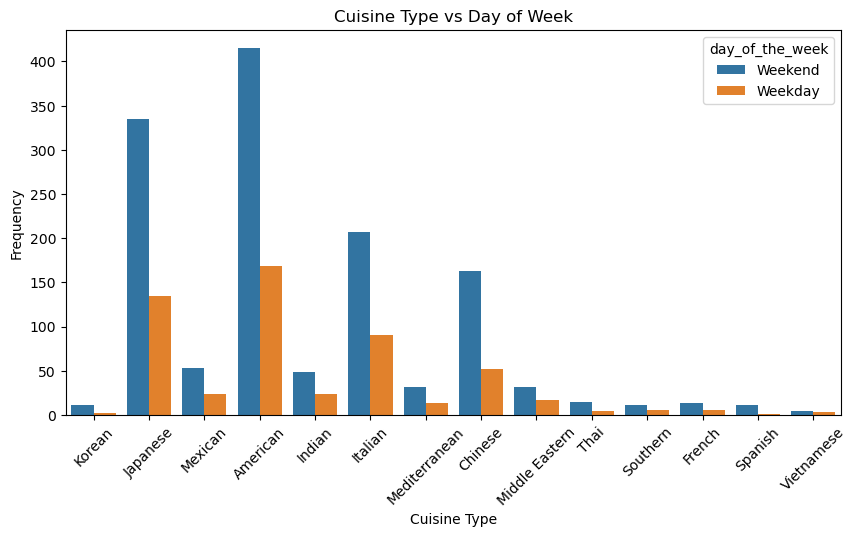

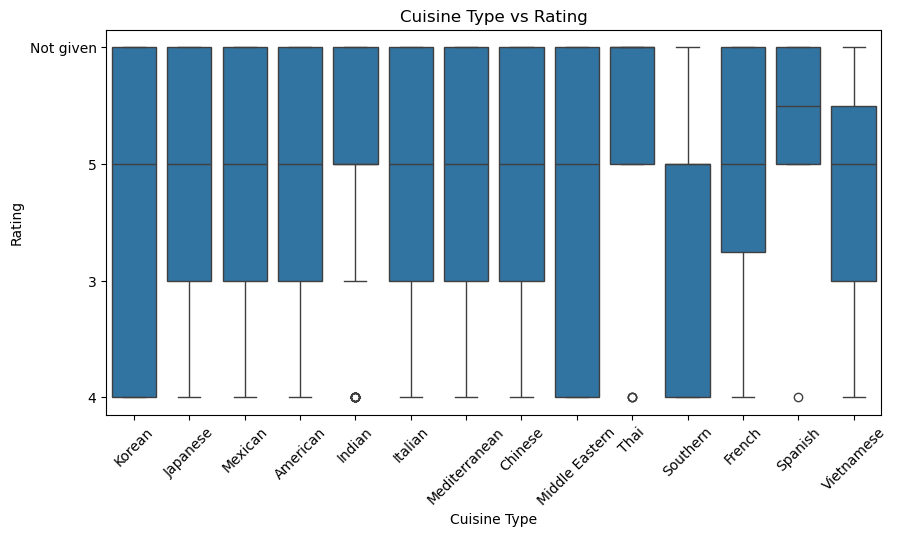

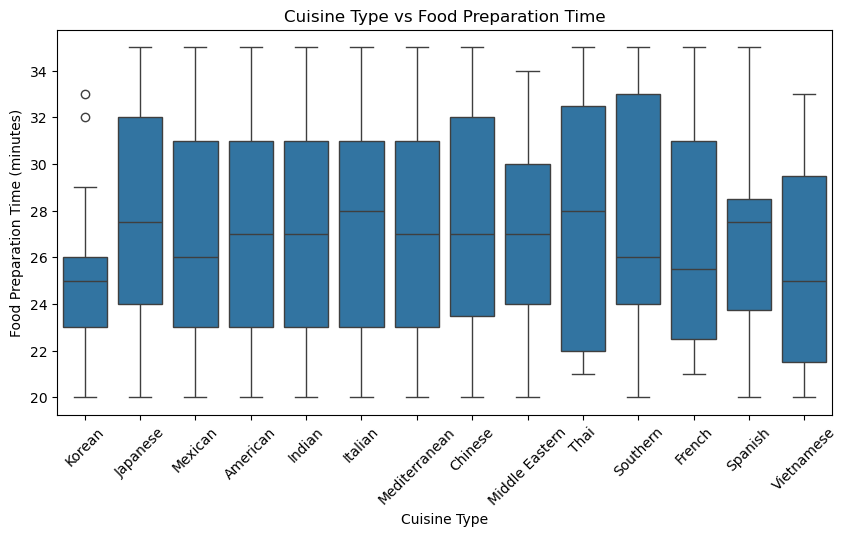

In [48]:
# relationship between cuisine type and cost
plt.figure(figsize = (10, 5))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = dataset) # create boxplot 
plt.title("Cuisine Type vs Cost of Order") # titles/labels for better understanding/readability
plt.xlabel("Cuisine Type")
plt.ylabel("Cost of Order")
plt.xticks(rotation = 45)
plt.show()

# relationship between cuisine type and day of the week
plt.figure(figsize = (10, 5))
sns.countplot(x = "cuisine_type", hue = "day_of_the_week", data = dataset) # create countplot
plt.title("Cuisine Type vs Day of Week") # titles/labels for better understanding/readability
plt.xlabel("Cuisine Type")
plt.ylabel("Frequency")
plt.xticks(rotation = 45)
plt.show()

# relationship between cuisine type and rating
plt.figure(figsize = (10, 5))
sns.boxplot(x = "cuisine_type", y = "rating", data = dataset) # create boxplot
plt.title("Cuisine Type vs Rating") # titles/labels for better understanding/readability
plt.xlabel("Cuisine Type")
plt.ylabel("Rating")
plt.xticks(rotation = 45)
plt.show()

# relationship between cuisine type and food preparation time
plt.figure(figsize = (10, 5))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = dataset) # create boxplot
plt.title("Cuisine Type vs Food Preparation Time") # titles/labels for better understanding/readability
plt.xlabel("Cuisine Type")
plt.ylabel("Food Preparation Time (minutes)")
plt.xticks(rotation = 45)
plt.show()

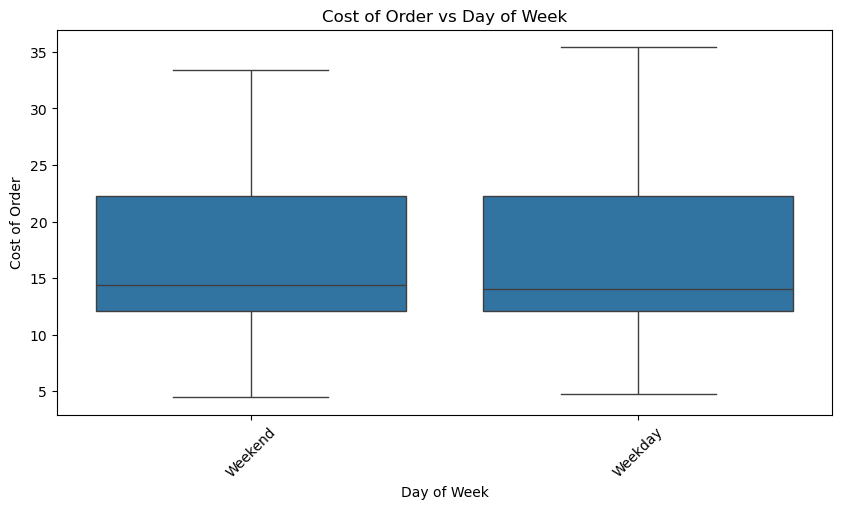

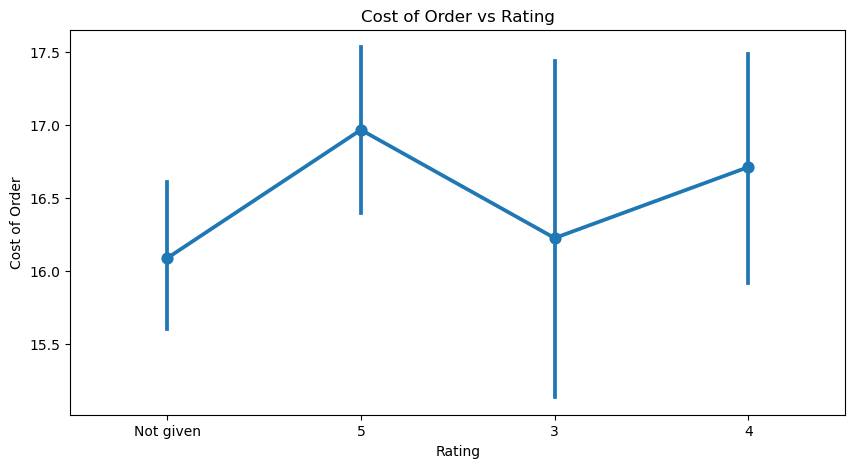

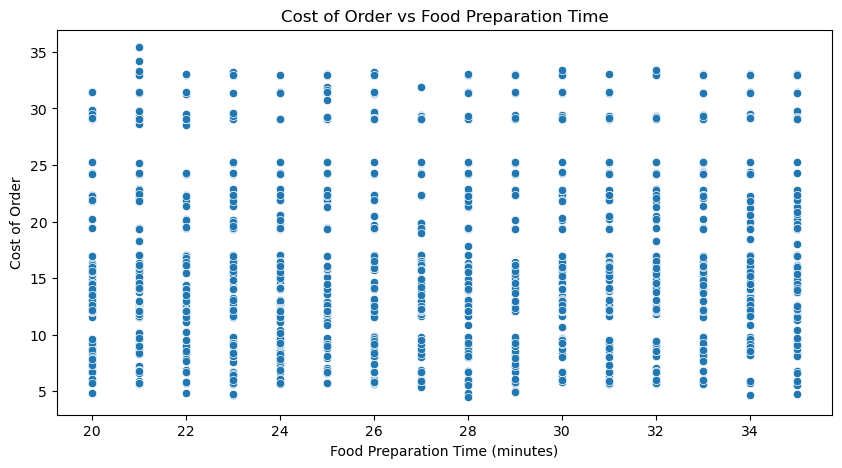

In [49]:
# relationship between cost and day of the week
plt.figure(figsize = (10, 5))
sns.boxplot(x = "day_of_the_week", y = "cost_of_the_order", data = dataset) # create boxplot
plt.title("Cost of Order vs Day of Week") # titles/labels for better understanding/readability
plt.xlabel("Day of Week")
plt.ylabel("Cost of Order")
plt.xticks(rotation = 45)
plt.show()

# relationship between cost and rating
plt.figure(figsize = (10, 5))
sns.pointplot(x = "rating", y = "cost_of_the_order", data = dataset) # create pointplot
plt.title("Cost of Order vs Rating") # titles/labels for better understanding/readability
plt.xlabel("Rating")
plt.ylabel("Cost of Order")
plt.show()

# relationship between cost and food preparation time
plt.figure(figsize = (10, 5))
sns.scatterplot(x = "food_preparation_time", y = "cost_of_the_order", data = dataset) # create scatterplot
plt.title("Cost of Order vs Food Preparation Time") # titles/labels for better understanding/readability
plt.xlabel("Food Preparation Time (minutes)")
plt.ylabel("Cost of Order")
plt.show()

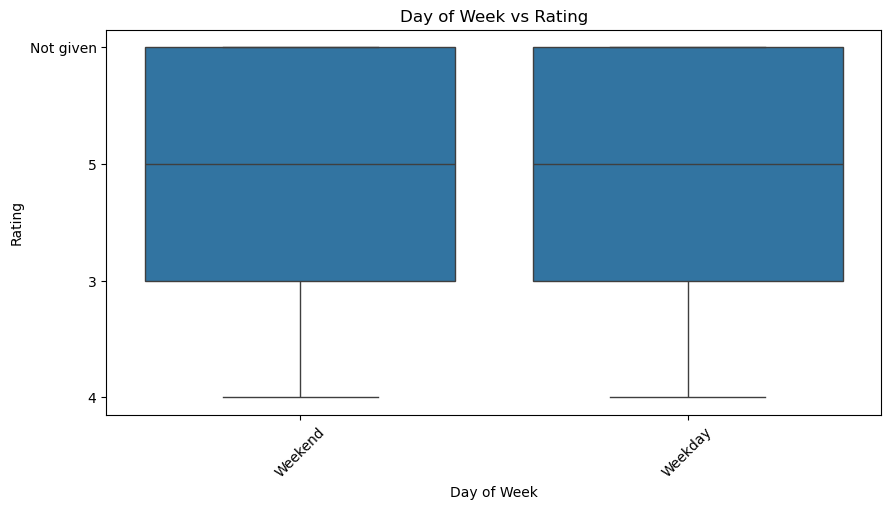

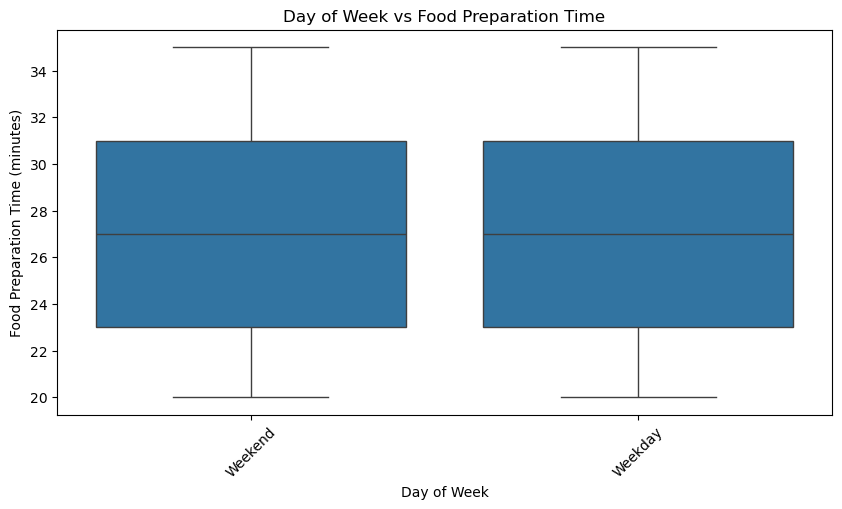

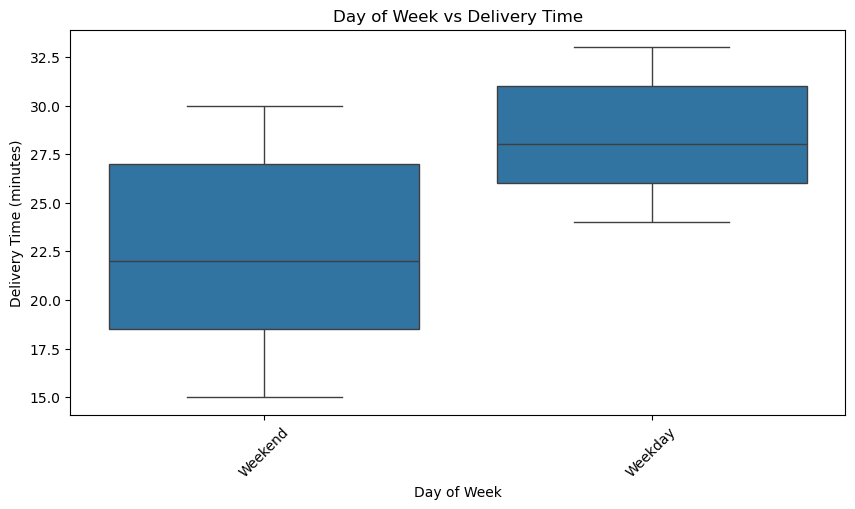

In [50]:
# relationship between day of the week and rating
plt.figure(figsize = (10, 5))
sns.boxplot(x = "day_of_the_week", y = "rating", data = dataset) # create boxplot
plt.title("Day of Week vs Rating") # titles/labels for better understanding/readability
plt.xlabel("Day of Week")
plt.ylabel("Rating")
plt.xticks(rotation = 45)
plt.show()

# relationship between day of the week and food preparation time
plt.figure(figsize = (10, 5))
sns.boxplot(x = "day_of_the_week", y = "food_preparation_time", data = dataset) # create boxplot
plt.title("Day of Week vs Food Preparation Time") # titles/labels for better understanding/readability
plt.xlabel("Day of Week")
plt.ylabel("Food Preparation Time (minutes)")
plt.xticks(rotation = 45)
plt.show()

# relationship between day of the week and delivery time
plt.figure(figsize = (10, 5))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = dataset) # create boxplot
plt.title("Day of Week vs Delivery Time") # titles/labels for better understanding/readability
plt.xlabel("Day of Week")
plt.ylabel("Delivery Time (minutes)")
plt.xticks(rotation = 45)
plt.show()

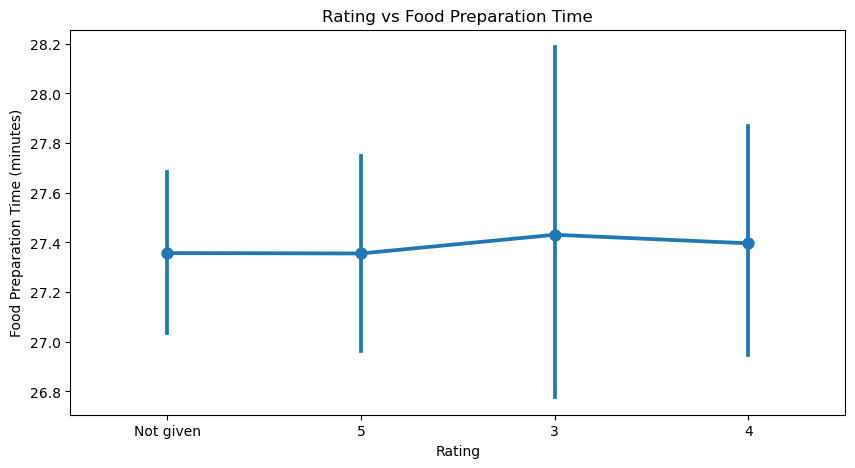

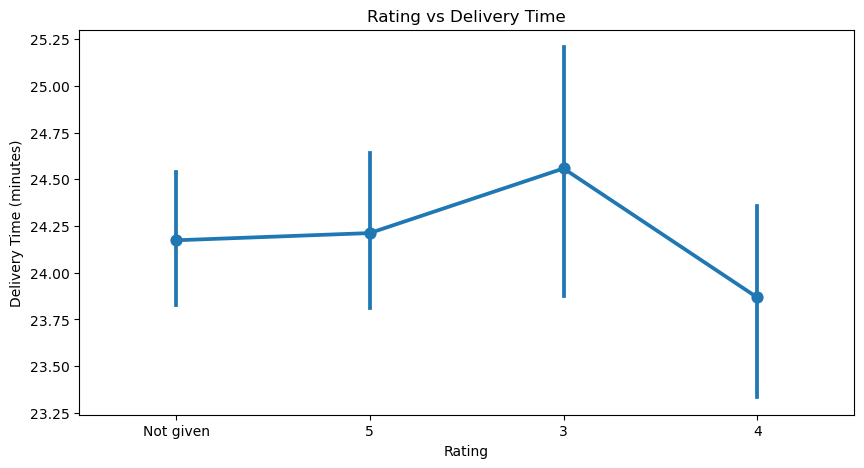

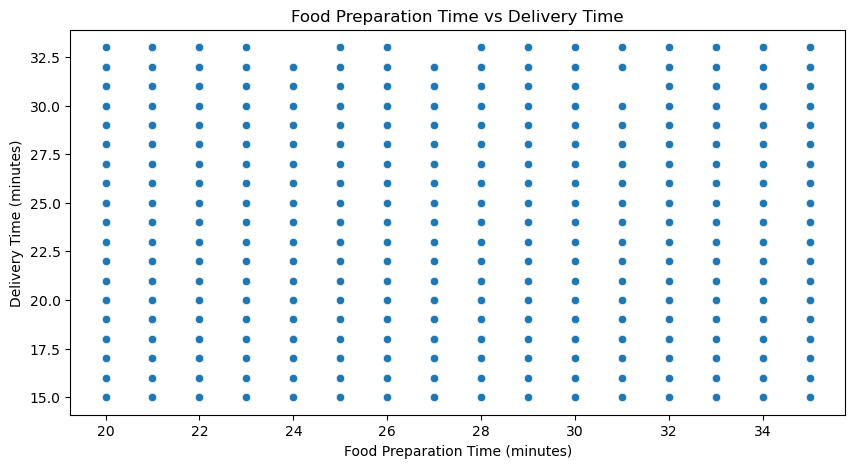

In [51]:
# relationship between rating and food preparation time
plt.figure(figsize = (10, 5))
sns.pointplot(x = "rating", y = "food_preparation_time", data = dataset) # create pointplot
plt.title("Rating vs Food Preparation Time") # titles/labels for better understanding/readability
plt.xlabel("Rating")
plt.ylabel("Food Preparation Time (minutes)")
plt.show()

# relationship between rating and delivery time
plt.figure(figsize = (10, 5))
sns.pointplot(x = "rating", y = "delivery_time", data = dataset) # create pointplot
plt.title("Rating vs Delivery Time") # titles/labels for better understanding/readability
plt.xlabel("Rating")
plt.ylabel("Delivery Time (minutes)")
plt.show()

# relationship between food preparation time and delivery time
plt.figure(figsize = (10, 5))
sns.scatterplot(x = "food_preparation_time", y = "delivery_time", data = dataset) # create scatterplot
plt.title("Food Preparation Time vs Delivery Time") # titles/labels for better understanding/readability
plt.xlabel("Food Preparation Time (minutes)")
plt.ylabel("Delivery Time (minutes)")
plt.show()

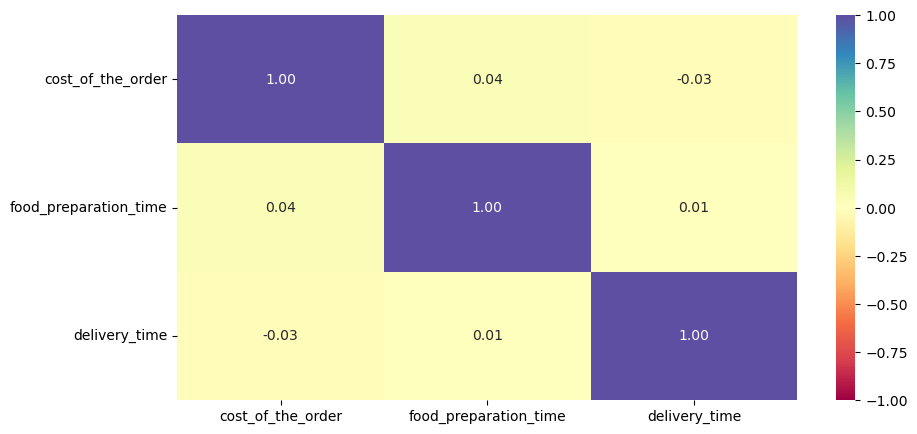

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

In [52]:
# correllation between variables
column_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize = (10, 5))
sns.heatmap(dataset[column_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral") # create heatmap
plt.show()

# restaurants' revenue most to least
dataset.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14) # find which restaurants made most $$

#### Observations:
From the graphs, it’s clear that the cost of orders changes depending on the cuisine — Southern and French dishes tend to be pricier, likely because of fancier ingredients or more effort in prep. American and Japanese cuisines are still the favorites on weekends, while cuisines like Korean, Spanish, and Vietnamese are ordered much less. Ratings don’t change much by cuisine or day, but a lot of orders don’t have ratings, so it seems like people often skip leaving feedback. Food prep times are pretty consistent across the board, usually around 26 to 30 minutes, regardless of cuisine type. Costs and day of the week, costs and ratings, and costs and food preparation times all seem to have little or no correlation or relationship with each other. Ratings and food preparation times are consistent on weekdays and weekends, however delivery times seem faster on weekends, which could be due to better staffing for the rush. Also, there seems to be no link between food preparation time/ delivery time and a rating, meaning that many people might be basing ratings on quality of food rather than the wait time to receive their orders. And lastly, food prep and delivery times don’t seem to affect each other, showing they work independently.

### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [54]:
# filter out rows where rating is not "not given"
filtered_data = dataset[dataset['rating'] != 'Not given'].copy()

# convert 'rating' column to int
filtered_data['rating'] = filtered_data['rating'].astype(int)

# create dataframe with restaurants and their rating counts
rating_counts = (
    filtered_data.groupby('restaurant_name')['rating']
    .count()
    .sort_values(ascending = False)
    .reset_index())
rating_counts.rename(columns = {'rating': 'rating_count'}, inplace = True)

# filter restaurants with rating count greater than 50
eligible_rests = rating_counts[
    rating_counts['rating_count'] > 50]['restaurant_name']

# filter the dataset to include only eligible restaurants
eligible_rest_data = filtered_data[
    filtered_data['restaurant_name'].isin(eligible_rests)].copy()

# group by restaurant name and calculate avg rating
avg_ratings = (
    eligible_rest_data.groupby('restaurant_name')['rating']
    .mean()
    .sort_values(ascending = False)
    .reset_index())
avg_ratings.rename(columns = {'rating': 'average_rating'}, inplace = True)

# filter restaurants with avg rating greater than 4
promo_offers = avg_ratings[avg_ratings['average_rating'] > 4
    ].sort_values(by = 'average_rating', ascending = False).reset_index(drop = True)

# print results
print(promo_offers)

             restaurant_name  average_rating
0          The Meatball Shop        4.511905
1  Blue Ribbon Fried Chicken        4.328125
2                Shake Shack        4.278195
3          Blue Ribbon Sushi        4.219178


#### Observations:
These 4 restaurants likely have consistent positive customer feedback and a loyal customer base, making them candidates for promotional advertising. Offering promotions at these establishments could further enhance their reputation and attract new customers who value highly-rated dining experiences.

### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [57]:
# function to calculate revenue based on cost
def calculate_revenue(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# calculate revenue for each order and store in new column
dataset['revenue'] = dataset['cost_of_the_order'].apply(calculate_revenue)

# get total revenue and print it
net_revenue = dataset['revenue'].sum()
print('Net revenue: $', round(net_revenue, 2), sep = "")

# display the first few rows of dataset with new column
dataset.head()

Net revenue: $6166.3


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


#### Observations:
The company generated a net revenue of $6166.3 from orders based on their pricing structure, which charges higher percentages on more expensive orders. It reflects a strategy where the company benefits more from larger transactions, aligning with typical revenue models in service-oriented businesses.

### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed?

In [60]:
# calculate total time
dataset['total_time'] = dataset['food_preparation_time'] + dataset['delivery_time']

# calculate percentage of orders with total time > 60 minutes
orders_over_60 = (dataset['total_time'] > 60).sum()
percentage_over_60 = (orders_over_60 / len(dataset)) * 100

# print result with two decimal places
print('Percentage of orders taking more than 60 minutes: ', round(percentage_over_60, 2), '%')

Percentage of orders taking more than 60 minutes:  10.54 %


#### Observations:
This percentage suggests a significant portion of orders experiencing longer delivery times, which could be due to factors such as peak demand periods, traffic conditions, or distance between restaurants and customers. Addressing these factors could potentially improve overall customer satisfaction and operational efficiency.

### The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [63]:
# Write the code here

# find mean delivery time on weekdays and print it
avg_weekday_delivery = round(dataset[dataset['day_of_the_week'] == 'Weekday']['delivery_time'].mean())
print('Mean delivery time on weekdays: ', avg_weekday_delivery, ' minutes', sep = "")

# find mean delivery time on weekends and print it
avg_weekend_delivery = round(dataset[dataset['day_of_the_week'] == 'Weekend']['delivery_time'].mean())
print('Mean delivery time on weekends: ', avg_weekend_delivery, ' minutes', sep = "")


Mean delivery time on weekdays: 28 minutes
Mean delivery time on weekends: 22 minutes


#### Observations:
The mean delivery time on weekdays is approximately 28 minutes, whereas on weekends, it reduces to around 22 minutes. This difference could be attributed to various factors such as lower traffic congestion or more efficient scheduling and staffing on weekends.

### Conclusion and Recommendations

### **Question 17:** What are the conclusions from the analysis? What recommendations would help improve the business? 

### Conclusions:
*  Based on the analysis completed in this project, there were many conclusions to be drawn. I observed that American cuisine is the most popular type, especially on weekends, with over 400 orders. This popularity could stem from its universal appeal and variety of options. The histogram of order costs reveals that most orders are priced between 10-20 dollars, with relatively fewer high-value orders above 25 dollars. Additionally, weekend orders outnumber weekday orders significantly, indicating higher customer activity during leisure days. The ratings distribution shows a concerning trend: a high number of orders (736) were not rated, while most rated orders received a rating of 5, suggesting room for improved feedback collection. The graphs highlight interesting relationships. For example, the preparation times and delivery times are fairly consistent across cuisines, with a slight variation in mean times for certain types like Vietnamese and Korean. Delivery times on weekdays are generally longer than weekends, averaging around 28 minutes on weekdays versus 22 minutes on weekends, likely due to traffic and working schedules. The correlation matrix indicates weak correlations between numerical variables such as cost, preparation time, and delivery time, suggesting that these factors operate somewhat independently in the dataset.

### Recommendations:

*  To enhance business performance, I recommend focusing on American cuisine for promotional campaigns, especially during weekends, to align with peak demand. Encouraging customers to provide ratings through incentives such as discounts or loyalty points could help gather more feedback and identify areas for improvement. Since delivery times on weekdays are longer, optimizing delivery routes and deploying more riders during these periods could help reduce delays. Additionally, restaurants offering cuisines like Korean and Vietnamese, which have fewer orders, could explore bundling options or special deals to attract more customers. Lastly, analyzing cost dynamics further to understand why most orders fall within the 10-20 dollar range could help design pricing strategies to boost higher-value orders.

---